# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [3]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

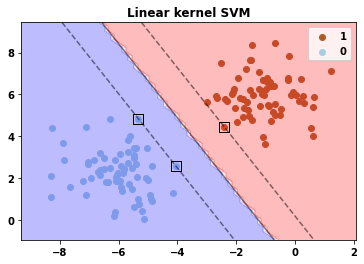

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

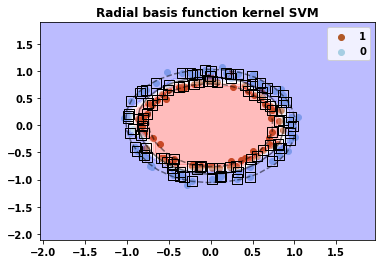

In [36]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# build the model
model = svm.SVC(kernel='rbf',  random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Radial basis function kernel SVM')
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>
When the relation between the predictors and the outcome are non-linear. Take the problem above where the instances are separated by a circular boundary. A linear kernel cannot obtain a good solution, because it can only form straight line boundaries (or hyperplanes in higher dimensional problems). 

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>
If the features are not in the same scale, the algorithm might favor certain features over others. This is due to the fact the algorithm takes into account the distances between the instances in the feature space and the decision boundary. For the RBF kernel $\displaystyle e^{-\gamma ||x -x'||^2}$ this is even a greater concern due to the fact the Euclidean distance is used. 

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

<font color='red'>Glenn: ??? Ze vragen om een SVM CLASSIFIER, maar willen dat je drug response (Continuous variable) predict vanuit gene expression ??? Code hieronder gebruikt SVM regression om dat dan te bereiken maar lijkt me gek dat ze het hierboven ook alleen maar over classification hebben? + De classification_report hint ook naar classification. Ditzelfde geld voor de random forest hieronder</font>

<font color='#FF0000'>Troy: Zie canvas discussie forum</font>

In [23]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Initialize (pseudo-) random number generator with a seed
# for reproducibility of results
np.random.seed(40)

def do_gridsearch(X_train, y_train, X_test, y_test, params, crossvals=5, plot=True):
    """
    given a train and a test dataset, fit and evaluate Support vector regression with given degrees
    
    Parameters: 
        X_train: 2D (Datapoints x features) numpy array
            the datapoints on which to train the models
        y_train: 1D (Targets) numpy array
            the targets on which to train the models
        X_test: 2D (Datapoints x features) numpy array
            the datapoints on which to test the models
        y_test: 1D (Targets) numpy array
            the targets on which to test the models
        alphas: 1D numpy array
             alpha candidates
        crossvals: int
            amount of cross-validation folds
        plot: bool
            True for plotting the MSE scores, False for surpressing the plots
    
    returns: 
        a GridSearchCV object, containing the fitted models for every kernel in SVR
    """
    # Define the functions for polynomial features and linear regression
    model = svm.SVC()
    scaler = StandardScaler()

    # Define the pipeline, containing the polynomial transformation and the subsequent linear regression
    model = Pipeline([
                     ("scaler", scaler), # Should you normalize for SVM? Question above.
                     ("svm", model)
                    ])

    # Define a custom scoring system to evaluate the F1 score (lower is better)
    #f1 = make_scorer(f1_score,greater_is_better=True)

    # Define the Grid Search method
    gridsearch = GridSearchCV(model, params, scoring='f1', cv=crossvals)

    # Run Grid Search
    gridsearch.fit(X_train, y_train)
    
    # Predict targets for test set
    y_pred = gridsearch.predict(X_test)
    
    # Calculate F1 score of the predictions on the test set
    f1_test_set = f1_score(y_test, y_pred)
    print(f'F1 score (test set): {f1_test_set:.4}')
    
    return gridsearch

# Load data from CSV-files
gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

# Compute the z score and set all negative values to '0' ('sensitive')
# set all positive values to '1' ('resistant')
drug_response = ((drug_response - drug_response.mean()) / drug_response.std() > 0).astype(int)

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response, test_size=0.3)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
y_train, y_test = y_train.ravel(), y_test.ravel()

# List of dictionaries because each kernel has different parameters
params = [{'svm__kernel': ['linear', 'rbf'], 'svm__C': np.logspace(-3, 3, 7)},
          {'svm__kernel': ['rbf'], 'svm__C': np.logspace(-3, 3, 7), 'svm__gamma': np.logspace(-5, 2, 8)},
          {'svm__kernel': ['poly', 'sigmoid'], 'svm__C': np.logspace(-3, 3, 7), 'svm__degree': np.arange(2,5)},
          {'svm__kernel': ['poly', 'sigmoid'], 'svm__C': np.logspace(-3, 3, 7), 'svm__degree': np.arange(2,5), 'svm__gamma': np.logspace(-5, 2, 8)}]
                  
# Find optimal value for svm kernel using Grid Search
grids = do_gridsearch(X_train, y_train, X_test, y_test, params, 5)
#alphamin = grids.best_params_['svm__kernel']
print("Optimal parameters:")
for param, value in grids.best_params_.items():
    print(f'{param}: {value}')
    
# Make predictions on test set
y_pred = grids.predict(X_test)
print(classification_report(np.ravel(y_test), y_pred))


F1 score (test set): 0.5532
Optimal parameters:
svm__C: 10.0
svm__degree: 2
svm__kernel: sigmoid
              precision    recall  f1-score   support

           0       0.65      0.42      0.51        26
           1       0.46      0.68      0.55        19

    accuracy                           0.53        45
   macro avg       0.56      0.55      0.53        45
weighted avg       0.57      0.53      0.53        45



Now we compare the precision with a manually computed precision. The precision is given by:

$$ \text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}$$

<font color='#FF0000'> Vorig jaar werd er gezeurd dat het niet volledig handmatig was als er niet daadwerkelijk de true en false positives handmatig geteld waren.. </font>

For manual computation we get all true positives and false positives. First, in the cell below the true labels are shown together with the predicted labels.

In [34]:
for i in range(len(y_pred)):
    print(f'({i}) True: {y_test[i]} | Predicted: {y_pred[i]}')

print(np.sum(y_test[y_test==0] == y_pred[y_test==0]))

(0) True: 0 | Predicted: 1
(1) True: 0 | Predicted: 1
(2) True: 0 | Predicted: 1
(3) True: 0 | Predicted: 0
(4) True: 1 | Predicted: 1
(5) True: 0 | Predicted: 0
(6) True: 1 | Predicted: 1
(7) True: 1 | Predicted: 0
(8) True: 0 | Predicted: 1
(9) True: 0 | Predicted: 0
(10) True: 0 | Predicted: 1
(11) True: 0 | Predicted: 1
(12) True: 0 | Predicted: 0
(13) True: 0 | Predicted: 1
(14) True: 0 | Predicted: 1
(15) True: 1 | Predicted: 0
(16) True: 1 | Predicted: 1
(17) True: 1 | Predicted: 1
(18) True: 1 | Predicted: 1
(19) True: 0 | Predicted: 0
(20) True: 1 | Predicted: 1
(21) True: 1 | Predicted: 1
(22) True: 0 | Predicted: 1
(23) True: 1 | Predicted: 1
(24) True: 0 | Predicted: 1
(25) True: 0 | Predicted: 1
(26) True: 0 | Predicted: 1
(27) True: 0 | Predicted: 0
(28) True: 1 | Predicted: 0
(29) True: 1 | Predicted: 0
(30) True: 0 | Predicted: 0
(31) True: 0 | Predicted: 0
(32) True: 1 | Predicted: 1
(33) True: 0 | Predicted: 1
(34) True: 0 | Predicted: 0
(35) True: 0 | Predicted: 0
(3

The amount of true positives: $TP=13$ 
The amount of false positives: $FP=15$
The precision: 
$$ \text{Precision} = \frac{13}{13 + 15}=\frac{13}{28}\approx 0.46$$

This outcome corresponds with the precision for label '1'. We can repeat the same calculations 
for the precision of label '0':

The amount of true positives: $TP=13$ 
The amount of false positives: $FP=15$
The precision: 
$$ \text{Precision} = \frac{11}{11 + 6}=\frac{11}{17}\approx 0.65$$

The classification also shows a 'macro' average, which is the arithmetic mean: $\frac{1}{2}(0.65+0.46)\approx0.56$, and a weighted mean (weighted by the support): $\frac{1}{28+17}(28\cdot 0.65 + 17\cdot 0.46)\approx0.57$

## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

Mean squared error (test set): 5.449
Optimal kernel: 40


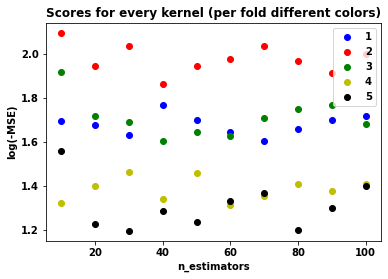

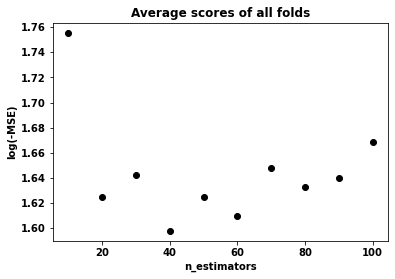

In [11]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Initialize (pseudo-) random number generator with a seed
# for reproducibility of results
np.random.seed(40)

def do_gridsearch(X_train, y_train, X_test, y_test, estim, crossvals=5, plot=True):
    """
    given a train and a test dataset, fit and evaluate Support vector regression with given degrees
    
    Parameters: 
        X_train: 2D (Datapoints x features) numpy array
            the datapoints on which to train the models
        y_train: 1D (Targets) numpy array
            the targets on which to train the models
        X_test: 2D (Datapoints x features) numpy array
            the datapoints on which to test the models
        y_test: 1D (Targets) numpy array
            the targets on which to test the models
        alphas: 1D numpy array
             alpha candidates
        crossvals: int
            amount of cross-validation folds
        plot: bool
            True for plotting the MSE scores, False for surpressing the plots
    
    returns: 
        a GridSearchCV object, containing the fitted models for every kernel in SVR
    """
    # Define the functions for polynomial features and linear regression
    model = RandomForestRegressor()
    scaler = StandardScaler()

    # Define the pipeline, containing the polynomial transformation and the subsequent linear regression
    model = Pipeline([
                     ("scaler", scaler), # Should you normalize for SVM? Question above.
                     ("forest", model)
                    ])

    # Define the hyperparameters for the Grid Search
    params = {'forest__n_estimators': estim}

    # Define a custom scoring system to evaluate the mean squared error (lower is better)
    mse = make_scorer(mean_squared_error,greater_is_better=False)

    # Define the Grid Search method
    gridsearch = GridSearchCV(model, params, scoring=mse, cv=crossvals)

    # Run Grid Search
    gridsearch.fit(X_train, y_train)
    
    # Predict targets for test set
    y_pred = gridsearch.predict(X_test)
    
    # Calculate MSE of the predictions on the test set
    MSE_test_set = mean_squared_error(y_test, y_pred)
    print(f'Mean squared error (test set): {MSE_test_set:.4}')
    
    if plot:
        # Plot MSE scores
        plt.figure()
        plt.title('Scores for every kernel (per fold different colors)')
        colors = ['b.', 'r.', 'g.', 'y.', 'k.', 'c.']
        for i in range(crossvals):
            q = gridsearch.cv_results_[f'split{i}_test_score']
            plt.plot(params['forest__n_estimators'], np.log(-q), colors[i % len(colors)], markersize=12)

        plt.xlabel('n_estimators')
        plt.ylabel('log(-MSE)')
        plt.legend(list(range(1,crossvals+1)))

        # Plot average MSE scores
        plt.figure()
        #plt.errorbar(np.log(params['lasso__alpha']), np.log(-gridsearch.cv_results_[f'mean_test_score']), np.log(gridsearch.cv_results_[f'std_test_score']), linestyle='None', marker='.',markersize=12)
        plt.plot(params['forest__n_estimators'], np.log(-gridsearch.cv_results_[f'mean_test_score']), 'k.', markersize=12)
        plt.title('Average scores of all folds')
        plt.xlabel('n_estimators')
        plt.ylabel('log(-MSE)');
    return gridsearch

# Load data from CSV-files
gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
y_train, y_test = y_train.ravel(), y_test.ravel()


# Define value range for hyperparams (optimal value to be found using Grid Search)
n_estimators_l = np.linspace(10,100,10).astype(int)

# Find optimal value for svm kernel using Grid Search
grids = do_gridsearch(X_train, y_train, X_test, y_test, n_estimators_l, 5)
alphamin = grids.best_params_['forest__n_estimators']
print(f"Optimal kernel: {alphamin}")

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>